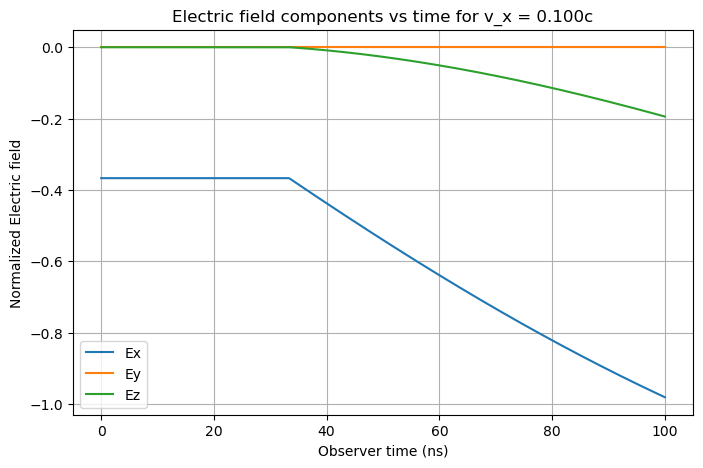

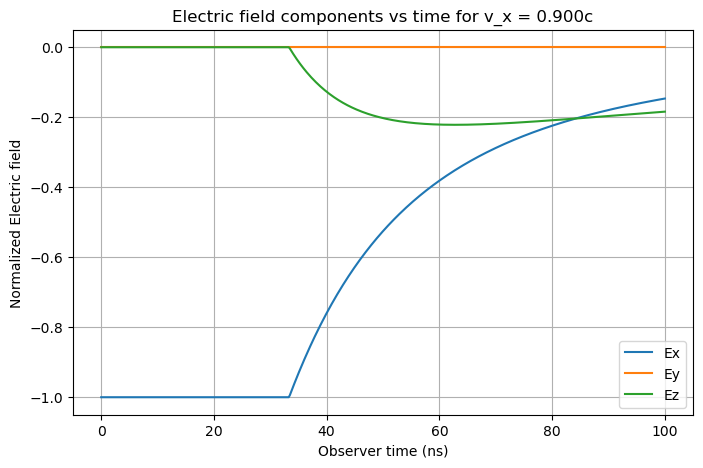

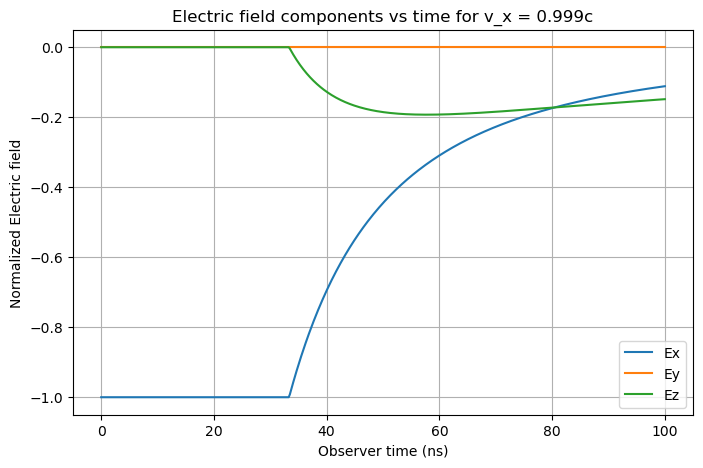

In [11]:
#when charge is accelerating along Z-direction and have initial velocity in X -direction.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

q = 1.6e-19          # Charge of the particle
c = 3e8              # Speed of light (m/s)
r_obs = np.array([0, 0, 10])  # Observer position (m)
t_obs_array = np.linspace(0, 1e-7, 500)  # Observation time (s)


def r_q(t, v_x, a_z):
    #Particle position at time
    return np.array([v_x*t, 0, 0.5*a_z*t**2])

def beta(t, v_x, a_z):
    #beta=(v/c) where v is velocity
    return np.array([v_x/c, 0, a_z*t/c])

def beta_dot(a_z):
    #beta_dot=a/c, where a is acceleration
    return np.array([0, 0, a_z/c])

# calculating retarted time
def retarded_time(t_obs, r_obs, v_x, a_z):
    def f(tr):
        return np.linalg.norm(r_obs - r_q(tr, v_x, a_z)) - c*(t_obs - tr)
    try:
        sol = root_scalar(f, bracket=[0, t_obs + np.linalg.norm(r_obs)/c], method='brentq')
        return sol.root
    except ValueError:
        return 0.0  

# Electric field function 
def E_field(t_obs, r_obs, v_x, a_z):
    tr = retarded_time(t_obs, r_obs, v_x, a_z)
    R_vec = r_obs - r_q(tr, v_x, a_z)
    R = np.linalg.norm(R_vec)
    if R == 0:
        return np.array([0, 0, 0])
    n_hat = R_vec / R
    b = beta(tr, v_x, a_z)
    bdot = beta_dot(a_z)
    kappa = 1 - np.dot(n_hat, b)
    term = np.cross(n_hat - b, bdot)
    E = (q / (c * R)) * np.cross(n_hat, term) / (kappa**3)
    return E

v_values = [0.1*c, 0.9*c, 0.999*c]  # velocities along x (m/s)
a_z = 0.3 * c                       # acceleration along z (m/s^2)


for v_x in v_values:
    E_fields = np.array([E_field(t, r_obs, v_x, a_z) for t in t_obs_array])
    B_fields=   np.array([B_field(t, r_obs, v_x, a_z) for t in t_obs_array])
    # Normalize for plotting
    E_fields /= np.max(np.linalg.norm(E_fields, axis=1))
    B_fields /= np.max(np.linalg.norm(E_fields, axis=1))
    plt.figure(figsize=(8,5))
    plt.plot(t_obs_array*1e9, E_fields[:,0], label='Ex')
    plt.plot(t_obs_array*1e9, E_fields[:,1], label='Ey')
    plt.plot(t_obs_array*1e9, E_fields[:,2], label='Ez')
    plt.xlabel('Observer time (ns)')
    plt.ylabel('Normalized Electric field')
    plt.title(f'Electric field components vs time for v_x = {v_x/c:.3f}c')
    plt.legend()
    plt.grid(True)

plt.show()


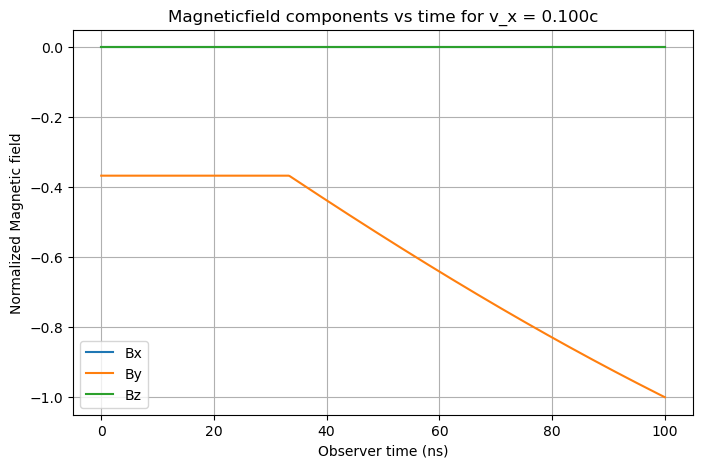

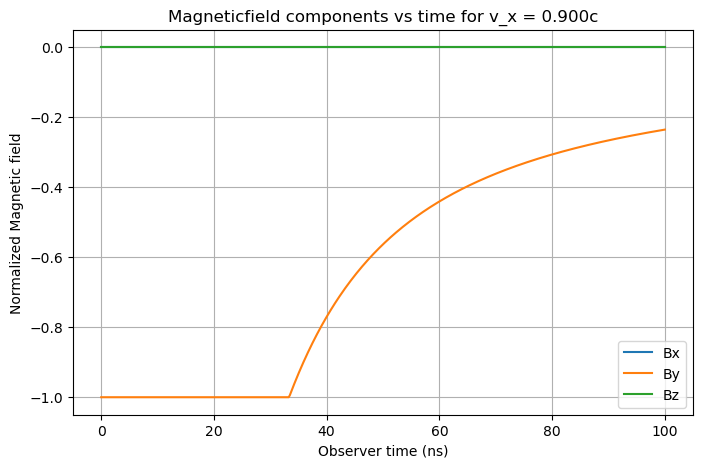

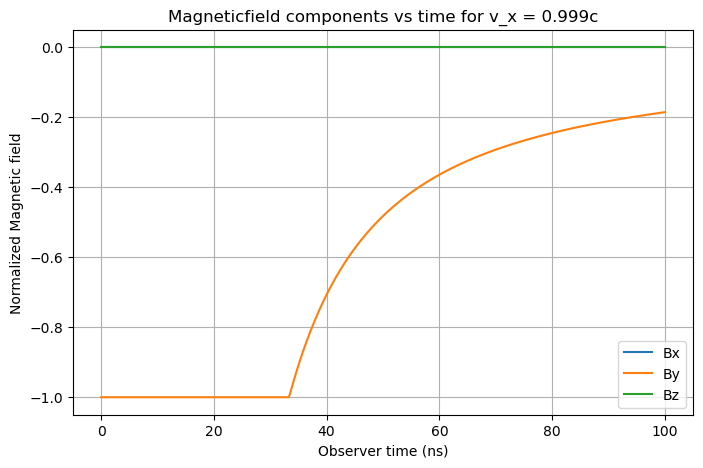

In [12]:
#Magnetic field
def B_field(t_obs, r_obs, v_x, a_z):
        E = E_field(t_obs, r_obs, v_x, a_z)
        R_vec = r_obs - r_q(retarded_time(t_obs, r_obs, v_x, a_z), v_x, a_z)
        R = np.linalg.norm(R_vec)
        n_hat = R_vec / R
        B = np.cross(n_hat, E)
        return B
v_values = [0.1*c, 0.9*c, 0.999*c]  # velocities along x (m/s)
a_z = 0.3 * c                       # acceleration along z (m/s^2)


for v_x in v_values:
    
    B_fields=   np.array([B_field(t, r_obs, v_x, a_z) for t in t_obs_array])
    # Normalize for plotting
    B_fields /= np.max(np.linalg.norm(B_fields, axis=1))
    plt.figure(figsize=(8,5))
    plt.plot(t_obs_array*1e9, B_fields[:,0], label='Bx')
    plt.plot(t_obs_array*1e9, B_fields[:,1], label='By')
    plt.plot(t_obs_array*1e9, B_fields[:,2], label='Bz')
    plt.xlabel('Observer time (ns)')
    plt.ylabel('Normalized Magnetic field')
    plt.title(f'Magneticfield components vs time for v_x = {v_x/c:.3f}c')
    plt.legend()
    plt.grid(True)

plt.show()


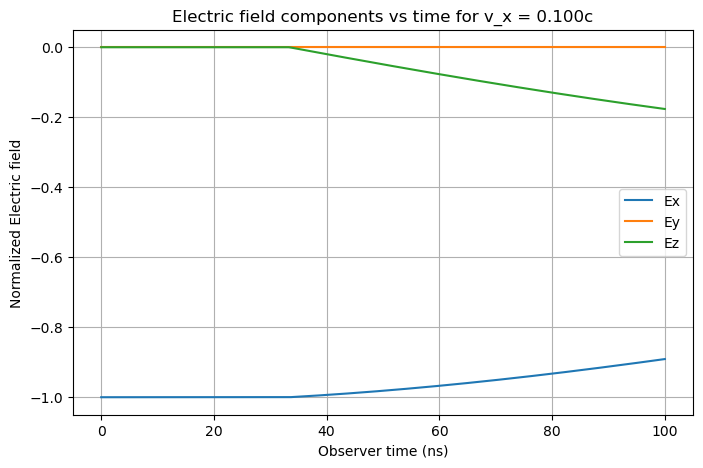

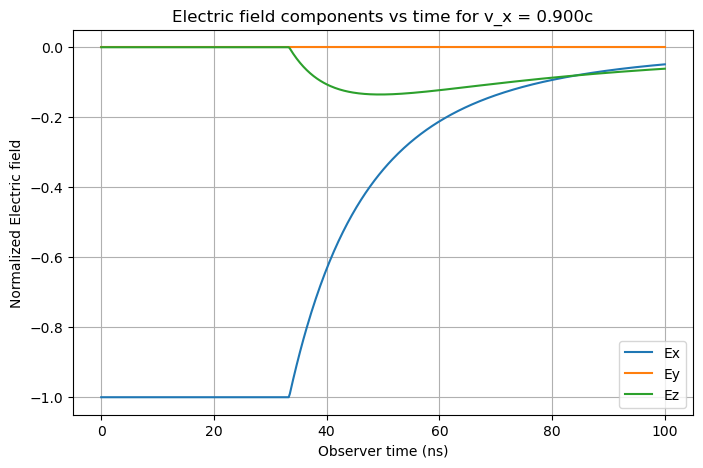

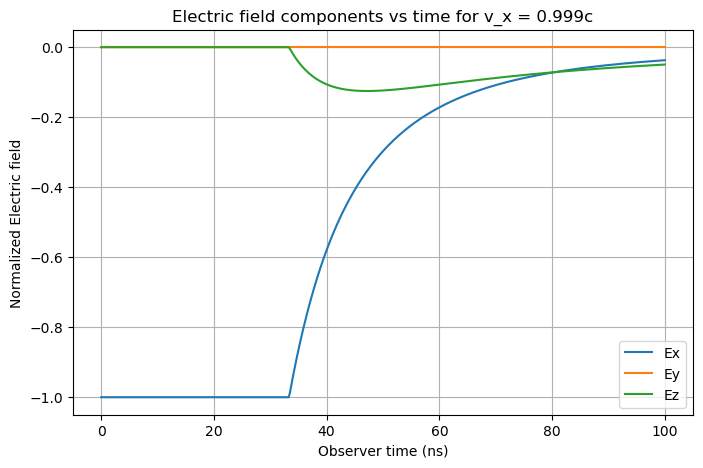

In [13]:
#when charge is accelerating along x-direction and have initial velocity in X -direction.
def r_q(t, v_x, a_x):
    #Particle position at time t
    return np.array([v_x*t+0.5*a_x*t**2,0,0])

def beta(t, v_x, a_x):
    #beta=v/c, where v is velocity.
    return np.array([(v_x/c)+(a_x*t/c),0,0])

def beta_dot(a_x):
    #beta_dot=a/c, where a is acceleration
    return np.array([a_x/c,0, 0])
# Calculating retarted time
def retarded_time(t_obs, r_obs, v_x, a_x):
    def f(tr):
        return np.linalg.norm(r_obs - r_q(tr, v_x, a_x)) - c*(t_obs - tr)
    try:
        sol = root_scalar(f, bracket=[0, t_obs + np.linalg.norm(r_obs)/c], method='brentq')
        return sol.root
    except ValueError:
        return 0.0  

# Electric field function 
def E_field(t_obs, r_obs, v_x, a_x):
    tr = retarded_time(t_obs, r_obs, v_x, a_x)
    R_vec = r_obs - r_q(tr, v_x, a_x)
    R = np.linalg.norm(R_vec)
    if R == 0:
        return np.array([0, 0, 0])
    n_hat = R_vec / R
    b = beta(tr, v_x, a_x)
    bdot = beta_dot(a_x)
    kappa = 1 - np.dot(n_hat, b)
    term = np.cross(n_hat - b, bdot)
    E = (q / (c * R)) * np.cross(n_hat, term) / (kappa**3)
    return E

v_values = [0.1*c, 0.9*c, 0.999*c]  # velocities along x (m/s)
a_x = 0.9 * c                       # acceleration along x (m/s^2)


for v_x in v_values:
    E_fields = np.array([E_field(t, r_obs, v_x, a_x) for t in t_obs_array])
    # Normalize for plotting
    E_fields /= np.max(np.linalg.norm(E_fields, axis=1))
    plt.figure(figsize=(8,5))
    plt.plot(t_obs_array*1e9, E_fields[:,0], label='Ex')
    plt.plot(t_obs_array*1e9, E_fields[:,1], label='Ey')
    plt.plot(t_obs_array*1e9, E_fields[:,2], label='Ez')
    plt.xlabel('Observer time (ns)')
    plt.ylabel('Normalized Electric field')
    plt.title(f'Electric field components vs time for v_x = {v_x/c:.3f}c')
    plt.legend()
    plt.grid(True)

plt.show()

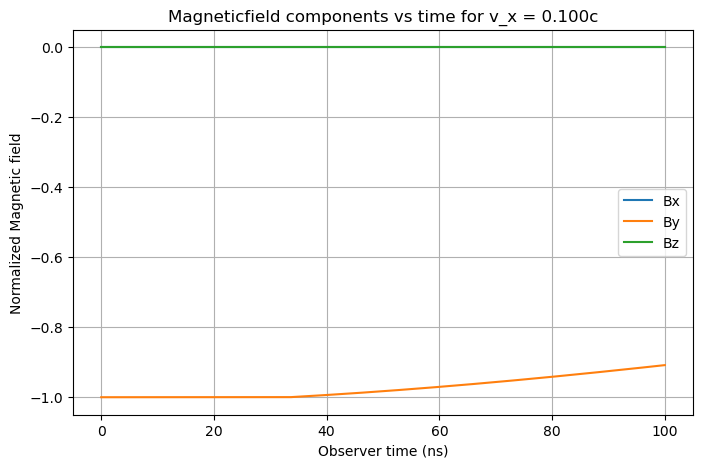

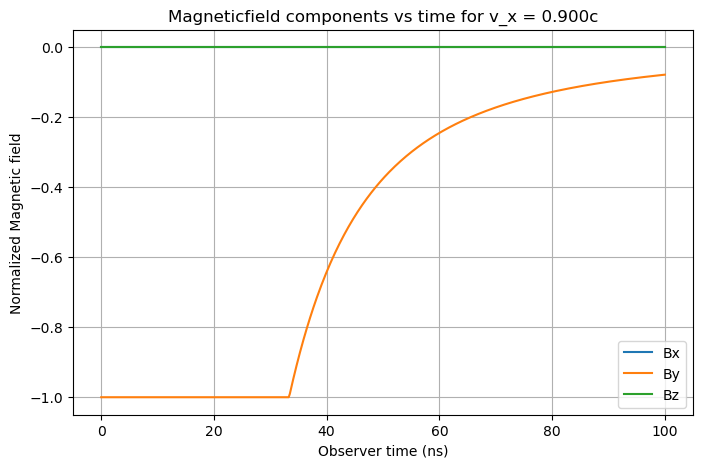

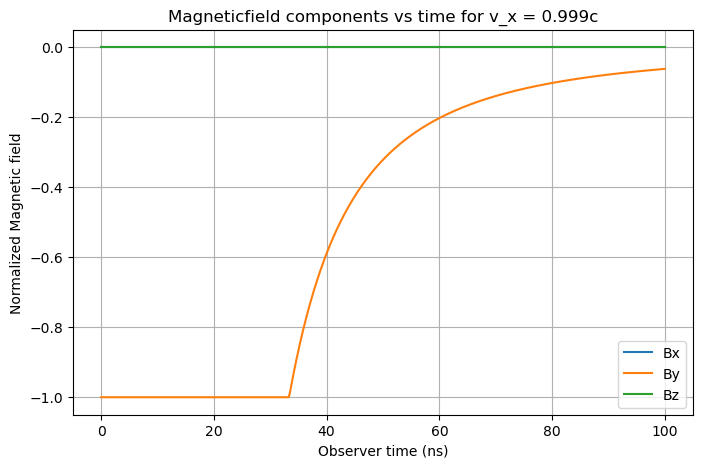

In [10]:
def B_field(t_obs, r_obs, v_x, a_x):
        E = E_field(t_obs, r_obs, v_x, a_x)
        R_vec = r_obs - r_q(retarded_time(t_obs, r_obs, v_x, a_x), v_x, a_x)
        R = np.linalg.norm(R_vec)
        n_hat = R_vec / R
        B = np.cross(n_hat, E)
        return B
v_values = [0.1*c, 0.9*c, 0.999*c]  # velocities along x (m/s)
a_x = 0.9 * c                       # acceleration along x (m/s^2)


for v_x in v_values:
    
    B_fields=   np.array([B_field(t, r_obs, v_x, a_x) for t in t_obs_array])
    # Normalize for plotting
    B_fields /= np.max(np.linalg.norm(B_fields, axis=1))
    plt.figure(figsize=(8,5))
    plt.plot(t_obs_array*1e9, B_fields[:,0], label='Bx')
    plt.plot(t_obs_array*1e9, B_fields[:,1], label='By')
    plt.plot(t_obs_array*1e9, B_fields[:,2], label='Bz')
    plt.xlabel('Observer time (ns)')
    plt.ylabel('Normalized Magnetic field')
    plt.title(f'Magneticfield components vs time for v_x = {v_x/c:.3f}c')
    plt.legend()
    plt.grid(True)

plt.show()
